<a href="https://colab.research.google.com/github/Fndong/ASTRO1221/blob/main/Calculating_Rotation_Curve_of_Milky_Way_Galaxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import astropy.units as u # import packages for astro units
import astropy.constants as ac # import package for astro constant
import numpy as np # import package for mathmatical functions

In [3]:
def calculatingOrbitalVelocity (M,R) :  #Defining the function for calculating orbital velocity | we input M as the mass and R for the Radius
  orbitalVelovity = np.sqrt(ac.G * M / R) # General variable that arent specific to the different elements of the milkyway
  return orbitalVelovity

In [4]:
M_bulge = 1.5 * 10**10 * u.solMass # Mass of the galatic bulge in solar masses
R = 10**0 * u.kpc # Radius of bulge in kiloparsec

In [5]:
print (np.arange(1,30) * u.kpc) # Creating an array for the radius of bulge
R_bulge = np.arange (1,30) * u.kpc

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.] kpc


In [6]:
v_bulge = calculatingOrbitalVelocity(M_bulge, R_bulge) # Calculating orbital velocity of the galatic bulge
print(v_bulge.to(u.km/u.s))

[253.99558864 179.60200312 146.64442148 126.99779432 113.59028044
 103.69326485  96.00130881  89.80100156  84.66519621  80.32045757
  76.58255145  73.32221074  70.44570143  67.88317646  65.58137899
  63.49889716  61.60297885  59.86733437  58.27058437  56.79514022
  55.42638148  54.15204145  52.96174134  51.84663242  50.79911773
  49.81263319  48.88147383  48.0006544   47.16579673] km / s


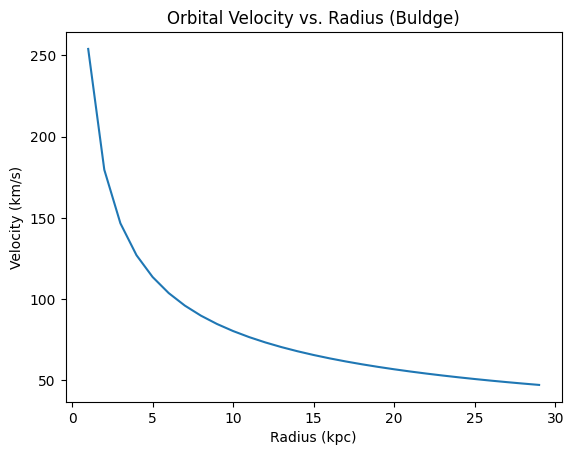

In [7]:
# prompt: can you help me with plotting v_bulge and R_bulge

import matplotlib.pyplot as plt

plt.plot(R_bulge, v_bulge.to(u.km/u.s))
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')
plt.title('Orbital Velocity vs. Radius (Buldge)')
plt.show()


In [8]:
M_BB = 4.1 * 10**6 * u.solMass * 1.5 * 10**10 * u.solMass # Combined mass of the Blackhole and Galatic bulge
R_BB = np.arange(-1000,100) * u.kpc #
print(np.arange (-1000,100) * u.kpc )

[-1000.  -999.  -998. ...    97.    98.    99.] kpc


In [29]:
v_BB = calculatingOrbitalVelocity(M_BB, R_BB) # Calculating orbital velocity of the Blackhole and Galatic bulge


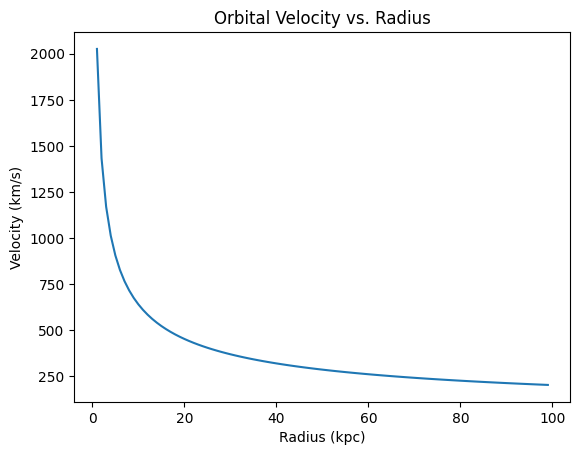

In [10]:
# prompt: can you help me with plotting v_BB and R_BB

import matplotlib.pyplot as plt
plt.plot(R_BB, v_BB)
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')
plt.title('Orbital Velocity vs. Radius')
plt.show()


Calculating the Disk

In [11]:
M_disk = 1e11 * u.solMass # Total mass of the disk
R_disk = 10 * u.kpc # Radius of whole disk
density_disk = M_disk / (np.pi * (R_disk**2)) # Calculating the density of the disk (Mass x Area of Disk )
print(density_disk.to(1e6 * u.solMass/u.kpc**2))

318.3098861837907 1e+06 solMass / kpc2


In [12]:
def calculatingEnclosedMassForDisk(R, density=318 * 1e6 * u.solMass/u.kpc**2): # Input the radius and default value for density to calculate mass
    """
    Calculate enclosed mass for the disk component
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 10 * u.kpc:
        M = np.pi * (R**2) * density
    else:
        R = 10 * u.kpc # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        M = np.pi * (R**2) * density
    return(M)


In [13]:
def calculatingEnclosedMassForMilkyWay(R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass): #Calculating mass of milky way with the disk and bulge
    """
    Note that the halo mass is missing here, so that is what you will work on this Friday
    """
    M_disk = calculatingEnclosedMassForDisk(R, density=density_disk)
    M_total = M_disk + M_bulge
    return(M_total)

In [14]:
R_arr = np.arange(1,30) * u.kpc #array for radius values

In [15]:
v_bulge_arr = calculatingOrbitalVelocity(M_bulge, R_arr)
M_disk = np.zeros(len(R_arr)) * u.solMass # Don't forget unit here # np.zeros inputs 0 in the array
M_total = np.zeros(len(R_arr)) * u.solMass
# Calculating enclosed masses for the disk and total component
for i in np.arange(len(R_arr)):
    M_disk[i] = calculatingEnclosedMassForDisk(R_arr[i]) #The mass disk values are inputed here
    M_total[i] = calculatingEnclosedMassForMilkyWay(R_arr[i])

# Calculating the resulting orbital velocity due to each component
v_disk_arr = calculatingOrbitalVelocity(M_disk, R_arr)
v_bulge_disk_arr = calculatingOrbitalVelocity(M_total, R_arr)

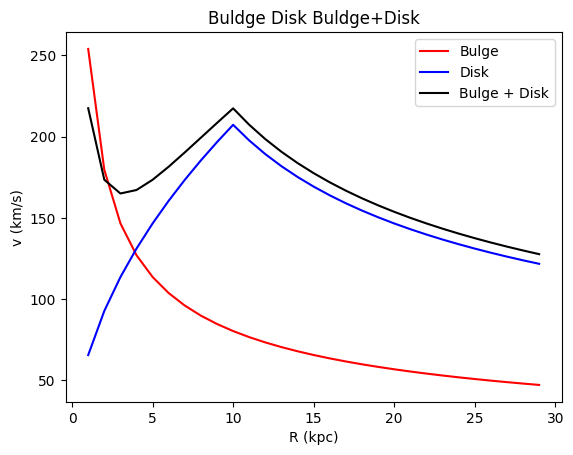

In [16]:
# Plot them all
plt.plot(R_arr.to(u.kpc), v_bulge_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.title('Buldge Disk Buldge+Disk')
plt.legend() # to show the legend of a figure
plt.show()


Calculating the Halo Component

In [17]:
M_halo = 1e12 * u.solMass # Mass of Halo
R_halo = 30 * u.kpc # Radius of Halo
density_halo = M_halo / (4/3 * np.pi * (R_halo**3)) # calculating the desnsity of the Halo by dividing the Mass by the radius x volume of sphere
print(density_halo.to(1e6 * u.solMass/u.kpc**3)) # printing the density of the Halo

8.841941282883075 1e+06 solMass / kpc3


In [18]:
# from re import M
def calculatingEnclosedMassForHalo(R, density=density_halo): # Defining calculations for enclosed mass of Halo
  M_halo = 4/3 * np.pi * (R**3) * density # calculations for mass of Halo
  return(M_halo)

In [19]:
def calculatingEnclosedMassForMilkyWay (R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass ): # Defining calculations for total enclosed mass of Milky Way
  M_disk = calculatingEnclosedMassForDisk(R)
  M_halo = calculatingEnclosedMassForHalo(R)
  M_total = M_disk + M_bulge + M_halo # Fuctions defined inside a another function will not be recognized outside of the fuction
  return(M_total)

In [20]:
Halo_arr = np.arange(1,30) * u.kpc # Radius of Halo inputs
print(Halo_arr)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.] kpc


In [21]:
M_halo_arr = calculatingEnclosedMassForHalo(Halo_arr) # Calculating Enclosed mass for halo
print(M_halo_arr)

[3.70370370e+07 2.96296296e+08 1.00000000e+09 2.37037037e+09
 4.62962963e+09 8.00000000e+09 1.27037037e+10 1.89629630e+10
 2.70000000e+10 3.70370370e+10 4.92962963e+10 6.40000000e+10
 8.13703704e+10 1.01629630e+11 1.25000000e+11 1.51703704e+11
 1.81962963e+11 2.16000000e+11 2.54037037e+11 2.96296296e+11
 3.43000000e+11 3.94370370e+11 4.50629630e+11 5.12000000e+11
 5.78703704e+11 6.50962963e+11 7.29000000e+11 8.13037037e+11
 9.03296296e+11] solMass


In [22]:
V_Halo_arr = calculatingOrbitalVelocity(M_halo_arr, Halo_arr) # Calculating orbital velocity of Halo based on calculated mass and inputs for radius
print(V_Halo_arr.to(u.km/u.s)) # print orbital velocity values


[ 12.62114227  25.24228454  37.86342681  50.48456908  63.10571135
  75.72685363  88.3479959  100.96913817 113.59028044 126.21142271
 138.83256498 151.45370725 164.07484952 176.69599179 189.31713406
 201.93827634 214.55941861 227.18056088 239.80170315 252.42284542
 265.04398769 277.66512996 290.28627223 302.9074145  315.52855677
 328.14969904 340.77084132 353.39198359 366.01312586] km / s


In [23]:
V_Halo_Bulge_arr = calculatingOrbitalVelocity(M_total, Halo_arr) # Velocities for Halo and Bulge
V_Halo_Disk_arr = calculatingOrbitalVelocity(M_disk, Halo_arr) # Veclocities for Halo and Disk

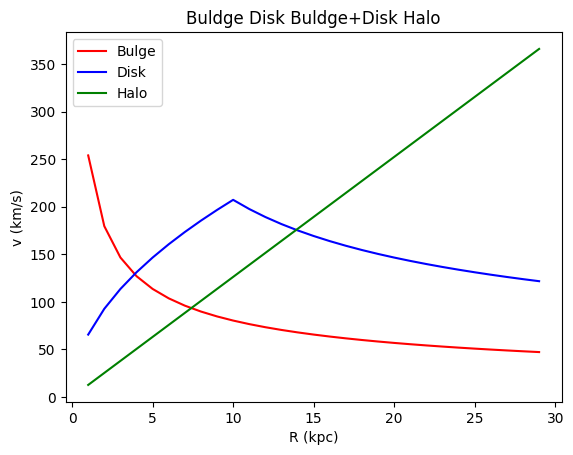

In [24]:
plt.plot(R_arr.to(u.kpc), v_bulge_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(Halo_arr.to(u.kpc), V_Halo_arr.to(u.km/u.s), color="green", label="Halo")#plotting the halo
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.title('Buldge Disk Buldge+Disk Halo')
plt.legend() # to show the legend of a figure
plt.show()

[217.499202   173.4878863  165.0047921  167.15027329 173.4516803
 181.51742748 190.31888695 199.37399018 208.4451211  217.4125548
 207.29473744 198.46960092 190.68342469 183.74714572 177.51660765
 171.87971627 166.74781767 162.04975057 157.72764498 153.73389182
 150.02891624 146.57951455 143.35759331 140.33920067 137.50377302
 134.83354266 132.31306728 129.92885276 127.66904816] km / s


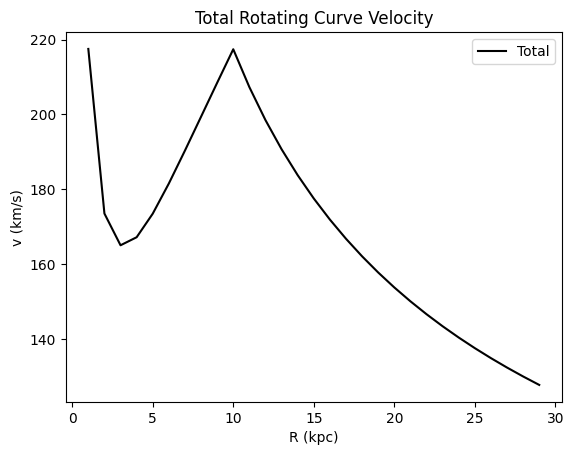

In [25]:
V_total = calculatingOrbitalVelocity(M_total,R_arr)
print(V_total.to(u.km/u.s))
plt.plot(R_arr.to(u.kpc), V_total.to(u.km/u.s), color="black", label="Total")
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.title('Total Rotating Curve Velocity')
plt.legend() # to show the legend of a figure
plt.show()

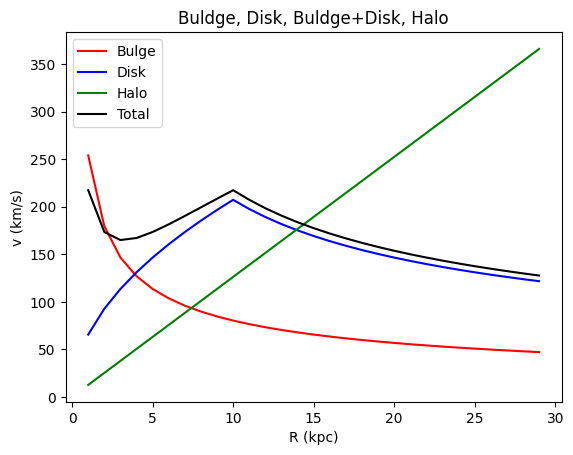

In [26]:
plt.plot(R_arr.to(u.kpc), v_bulge_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(Halo_arr.to(u.kpc), V_Halo_arr.to(u.km/u.s), color="green", label="Halo")#plotting the halo
plt.plot(R_arr.to(u.kpc), V_total.to(u.km/u.s), color="black", label="Total")
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.title('Buldge, Disk, Buldge+Disk, Halo')
plt.legend() # to show the legend of a figure
plt.show()

Plotting The Accuracy of Calculation

In [1]:
from google.colab import files # importing file for Galaxy Rotation Data
uploaded = files.upload()
# Read in the file
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


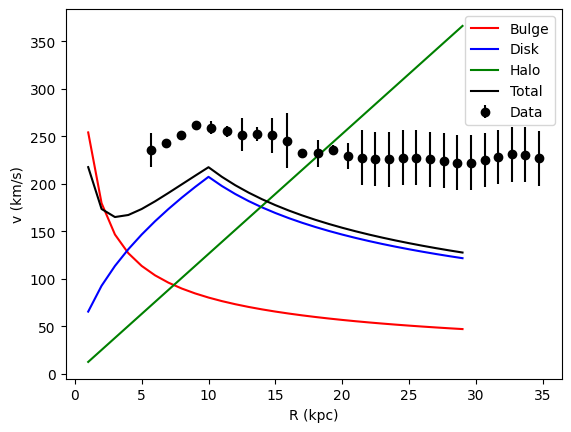

In [27]:
# Plot the Galaxy Rotation Data
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")

# Overplot our calculations, basically copy and pater from the previous plotting coding cell
plt.plot(R_arr.to(u.kpc), v_bulge_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(Halo_arr.to(u.kpc), V_Halo_arr.to(u.km/u.s), color="green", label="Halo")#plotting the halo
plt.plot(R_arr.to(u.kpc), V_total.to(u.km/u.s), color="black", label="Total")
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()